In [2]:
#loading the dataset
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


(7043, 21)

In [3]:
df.head()
#shape of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Inspect dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Note: 'TotalCharges' is stored as object type and needs conversion to numeric
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [6]:

# DATA CLEANING & PREPARATION


# Convert 'TotalCharges' from object to numeric
# Invalid values will be converted to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values in TotalCharges
df['TotalCharges'].isnull().sum()

# Observation:
# Only a small number of rows contain missing TotalCharges values

# Drop rows with missing TotalCharges (very small portion of dataset)
df = df.dropna(subset=['TotalCharges'])

# Drop customerID as it is an identifier and not useful for prediction
df = df.drop('customerID', axis=1)

# Encode target variable: Yes → 1, No → 0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Convert categorical variables into numerical format using one-hot encoding
# drop_first=True prevents dummy variable trap (multicollinearity)
df = pd.get_dummies(df, drop_first=True)

# Check final dataset shape
df.shape

# Observation:
# Dataset now contains only numeric features and is ready for model training

(7032, 31)

In [7]:

# MODEL BUILDING


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression Model


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Observation:
# Logistic Regression provides a strong baseline classification performance


# Random Forest Model


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Observation:
# Random Forest typically improves performance by capturing non-linear patterns

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7874911158493249
[[915 118]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest Accuracy: 0.7853589196872779
[[927 106]
 [196 178]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [8]:

# FEATURE IMPORTANCE ANALYSIS


import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance.head(10))

# Observation:
# The top features indicate the strongest drivers of customer churn
# These insights can help businesses focus on retention strategies
# Key churn drivers include:
# - Higher monthly and total charges
# - Shorter tenure
# - Fiber optic internet service
# - Electronic check payment method
# These insights suggest pricing and contract structure strongly influence churn behavior.

TotalCharges                      0.193409
MonthlyCharges                    0.169758
tenure                            0.167572
InternetService_Fiber optic       0.039999
PaymentMethod_Electronic check    0.035016
OnlineSecurity_Yes                0.028905
Contract_Two year                 0.028618
gender_Male                       0.026971
TechSupport_Yes                   0.025829
PaperlessBilling_Yes              0.025044
dtype: float64


In [ ]:
# MODEL IMPROVEMNET AND PROFESSIONALIZATION

In [9]:
#  PHASE 1: Improve churn detection using class balancing

log_model = LogisticRegression(max_iter=2000, class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Improved Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
# Using class balancing improves recall for churn class,
# making the model more suitable for real-world retention strategy.

Improved Logistic Regression Accuracy: 0.7348969438521677
[[737 296]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


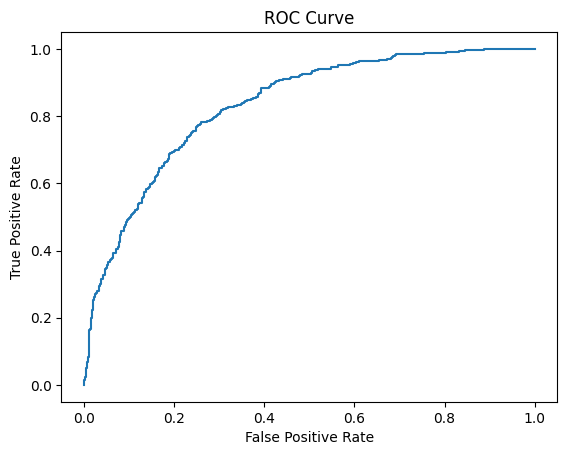

AUC Score: 0.831649160588287


In [10]:
#PHASE 2: Adding ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = log_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)

# ROC curve shows model’s ability to distinguish between churn and non-churn customers.
# AUC closer to 1 indicates better separability.
